<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dimension sayi ne qeder coxdursa o qeder bosluqda qalir, daha yaxsi train edir.

# PCA -> Principal Component Analysis


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', as_frame = False, parser = "auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_train)   # 784 den 2 dimensionala dusdu.
X_train.shape, X_reduced.shape

((60000, 784), (60000, 2))

In [ ]:
import numpy as np
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

154

In [ ]:
# cumsum  -> her defe sagdaki ile asagi soldaki yeni reqemi toplayir
# 1 --> 1
# 2 --> 3
# 3 --> 6
# 5 --> 11

In [ ]:
784 - 154

630

In [ ]:
pca.explained_variance_ratio_[:10]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

In [ ]:
cumsum[:10]

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ])

In [ ]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)


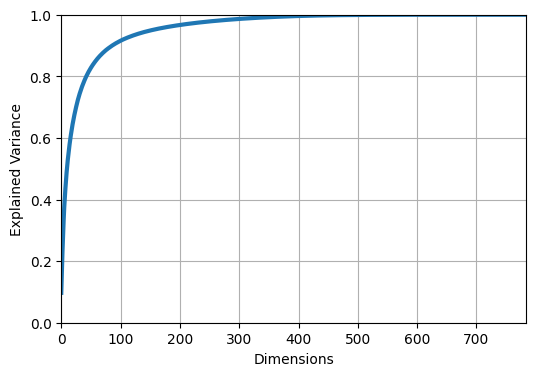

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth = 3)
plt.axis([0, 784, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV  # Random olaraq yoxlayir.
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state = 42),
                    RandomForestClassifier(random_state = 42))
param_distrib = {
    "pca__n_components" : np.arange(10,80),
    "randomforestclassifier__n_estimators" : np.arange(50,500)
}

rnd_search = RandomizedSearchCV (clf, param_distrib, n_iter = 10, cv = 3,  #cross validation
                                random_state = 42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [ ]:
print(rnd_search.best_params_)  # ne qeder piksele ehtiyac oldugunu gosterir

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [ ]:
rnd_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=23, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=465, random_state=42))])

In [ ]:
rnd_search.best_estimator_.score(X_test, y_test)

0.9532

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.9685

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state = 42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10,80)}
grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X_train[:1000], y_train[:1000])


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [ ]:
grid_search.best_params_

{'pca__n_components': 67}

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=67, random_state=42)),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8877

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)
lle = LocallyLinearEmbedding(n_components = 2, #iki olculuye getirir
                             n_neighbors = 10, random_state = 42)
X_unrolled = lle.fit_transform(X_swiss)

In [ ]:
X_swiss.shape, X_unrolled.shape

((1000, 3), (1000, 2))

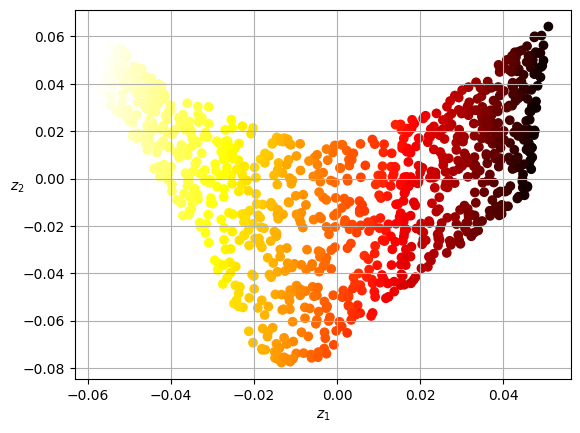

In [ ]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c = t, cmap = plt.cm.hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation = 0)
plt.grid(True)

plt.show()
